In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [ ]:
# Download Train Data
!git clone https://github.com/square-melon/ML_Final_Data.git

Cloning into 'ML_Final_Data'...
remote: Enumerating objects: 11272, done.
remote: Counting objects: 100% (2911/2911), done.
remote: Compressing objects: 100% (2728/2728), done.
remote: Total 11272 (delta 181), reused 2911 (delta 181), pack-reused 8361
Receiving objects: 100% (11272/11272), 244.53 MiB | 32.76 MiB/s, done.
Resolving deltas: 100% (1482/1482), done.
Checking out files: 100% (9899/9899), done.


Testing...
['CMakeLists.txt', '3rdparty', 'data', 'samples', 'COPYRIGHT', 'cmake', 'CONTRIBUTING.md', 'LICENSE', 'modules', 'include', 'platforms', 'doc', 'apps', '.editorconfig', 'SECURITY.md', 'README.md']


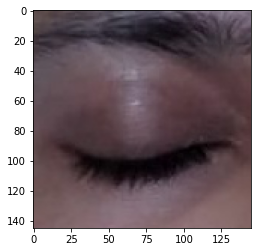

In [ ]:
file_path = '/content/ML_Final_Data/data'
opencv_path = '/content/ML_Final_Data/opencv-master'

import matplotlib.pyplot as plt
print('Testing...')
plt.imshow(plt.imread(file_path + '/Closed/_0.jpg'))
list_opencv = os.listdir(opencv_path)
print(list_opencv)

# labels

In [ ]:
labels = os.listdir(file_path)

In [ ]:
labels

['Open', 'no_yawn', 'Closed', 'yawn']

# visualize random 1 image

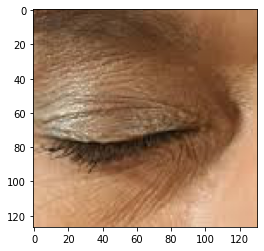

In [ ]:
#closeEye
import matplotlib.pyplot as plt
plt.imshow(plt.imread(file_path + "/Closed/_10.jpg"))

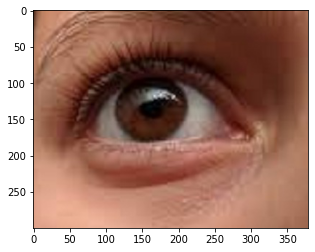

In [ ]:
#openEye
import matplotlib.pyplot as plt
plt.imshow(plt.imread(file_path + "/Open/_100.jpg"))

# image array

In [ ]:
a = plt.imread(file_path + "/yawn/10.jpg")

# image shape

In [ ]:
a.shape

(480, 640, 3)

# visualize yawn image. 
# Here background is unnecessary. we need only face image array

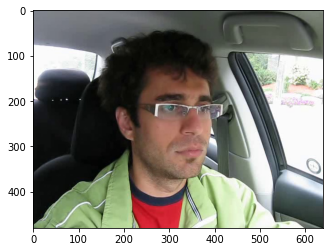

In [ ]:
#no yawn
plt.imshow(plt.imread(file_path + "/no_yawn/1028.jpg"))

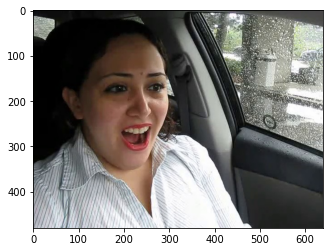

In [ ]:
#yawn
plt.imshow(plt.imread(file_path + "/yawn/104.jpg"))

# for yawn and not_yawn. Take only face

In [ ]:
def face_for_yawn(direc=file_path, face_cas_path=opencv_path + "/data/haarcascades_cuda/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no

# yawn_no_yawn = face_for_yawn()

0
1


# for closed and open eye

In [ ]:
def get_data(dir_path=file_path, face_cas=file_path + "/opencv-master/data/haarcascades_cuda/haarcascade_frontalface_default.xml", eye_cas=file_path + "/opencv-master/data/hogcascades/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
# data_train = get_data()

2
3


# extend data and convert array

In [ ]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

# new variable to store

In [ ]:
new_data = append_data()

0
1
2
3


<ipython-input-34-be15ac3ad549>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


# separate label and features

In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# reshape the array

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# label array

In [ ]:
y = np.array(y)

# train test split

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [ ]:
len(X_test)

578

In [ ]:
y_test

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

# Not necessary, only use to matching with my pc version

In [ ]:
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3

# import some dependencies

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

# Data Augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 394s 9s/step - loss: 1.2067 - accuracy: 0.4751 - val_loss: 0.9151 - val_accuracy: 0.6367
Epoch 2/50
43/43 [==============================] - 387s 9s/step - loss: 0.5925 - accuracy: 0.7543 - val_loss: 0.4027 - val_accuracy: 0.8599
Epoch 3/50
43/43 [==============================] - 390s 9s/step - loss: 0.4414 - accuracy: 0.8211 - val_loss: 0.3543 - val_accuracy: 0.8720
Epoch 4/50
43/43 [==============================] - 386s 9s/step - loss: 0.3450 - accuracy: 0.8664 - val_loss: 0.2157 - val_accuracy: 0.9273
Epoch 5/50
43/43 [==============================] - 388s 9s/step - loss: 0.3027 - accuracy: 0.8619 - val_loss: 0.2206 - val_accuracy: 0.8910
Epoch 6/50
43/43 [==============================] - 382s 9s/step - loss: 0.3058 - accuracy: 0.8619 - val_loss: 0.2041 - val_accuracy: 0.9118
Epoch 7/50
43/43 [==============================] - 383s 9s/step - loss: 0.2521 - accuracy: 0.8894 - val_loss: 0.1926 - val_accuracy: 0.8962
Epoch 8/50
43

# history

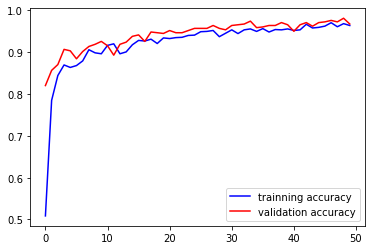

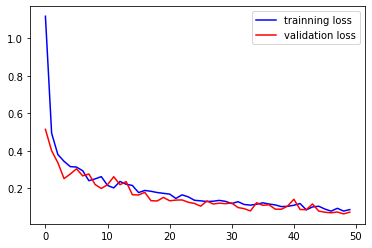

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# save model

In [ ]:
model.save("drowiness_new6.h5")

In [ ]:
model.save("drowiness_new6.model")

# Prediction

In [ ]:
prediction = model.predict_classes(X_test)

In [ ]:
prediction=prediction.reshape(-1,1)

In [ ]:
prediction.shape

(578, 1)

In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
import numpy as np

n_values = np.max(prediction) + 1
pred=np.eye(n_values)[prediction]
pred

array([[[0., 0., 0., 1.]],

       [[0., 0., 0., 1.]],

       [[0., 0., 1., 0.]],

       ...,

       [[0., 0., 0., 1.]],

       [[0., 0., 1., 0.]],

       [[0., 0., 1., 0.]]])

In [ ]:
print(y_test.shape)
print(pred.shape)
pred=np.reshape(pred, (578*1, 4))
pred

(578, 4)
(578, 1, 4)


array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

#Generate the confusion matrix
cf_matrix=confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print(cf_matrix)
print(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))



[[ 58   5   0   0]
 [ 17  55   2   0]
 [  2   2 202   9]
 [  0   1  15 210]]
0.9083044982698962


[Text(0, 0.5, 'yawn'),
 Text(0, 1.5, 'no_yawn'),
 Text(0, 2.5, 'Closed'),
 Text(0, 3.5, 'Open')]

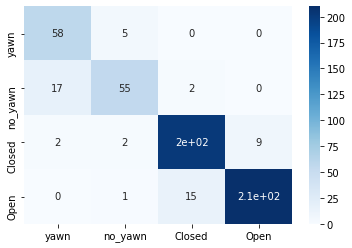

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.xaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])
ax.yaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])

# classification report

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.75      0.92      0.83        63
     no_yawn       0.87      0.74      0.80        74
      Closed       0.92      0.94      0.93       215
        Open       0.96      0.93      0.94       226

    accuracy                           0.91       578
   macro avg       0.88      0.88      0.88       578
weighted avg       0.91      0.91      0.91       578



# predicting function

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [ ]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1067.jpg")])
np.argmax(prediction)

1

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
np.argmax(prediction)

2

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Open/_104.jpg")])
np.argmax(prediction)

3

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/yawn/113.jpg")])
np.argmax(prediction)

0